In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime, time
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [191]:
#Regular Season - Points Per 100 Poss
#a box score estimate of the stats per 100 TEAM possessions
p19 = pd.read_csv('Team Ratings - Playoffs.csv')
p19 = p19[p19['Season']==2019]
p19['Team'] = p19['Team'].astype(str)
p19 = p19.drop(['Rk','G','W','L','W/L%','PW','PL'],axis=1)
p19 = p19.set_index(['Team','Season'])
p19['Reg ORtg'] = rs19['ORtg']
p19['Reg DRtg'] = rs19['DRtg']
p19['Reg NRtg'] = rs19['NRtg']
p19['Reg Pace'] = rs19['Pace']
p19['Reg FTr'] = rs19['FTr']
p19['Reg 3PAr']= rs19['3PAr']
p19['Reg TS%'] = rs19['TS%']
p19.reset_index(inplace=True)

In [192]:
p19

,Team,Season,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Reg ORtg,Reg DRtg,Reg NRtg,Reg Pace,Reg FTr,Reg 3PAr,Reg TS%
0,Toronto Raptors,2019,110.0,104.4,5.6,96.0,0.275,0.406,0.561,113.1,107.1,6.0,100.2,0.247,0.379,0.579
1,Golden State Warriors,2019,115.3,111.9,3.4,98.1,0.282,0.380,0.589,115.9,109.5,6.4,100.9,0.227,0.384,0.596
2,Milwaukee Bucks,2019,111.1,102.5,8.6,100.1,0.317,0.431,0.560,113.8,105.2,8.6,103.3,0.255,0.419,0.583
3,Portland Trail Blazers,2019,110.6,112.0,-1.4,96.0,0.274,0.363,0.541,114.7,110.5,4.2,99.1,0.258,0.339,0.568
4,Denver Nuggets,2019,114.4,112.5,1.9,92.6,0.279,0.308,0.538,113.0,108.9,4.1,97.7,0.232,0.348,0.558
5,Philadelphia 76ers,2019,109.9,106.8,3.1,98.9,0.301,0.331,0.559,112.6,110.0,2.6,101.6,0.312,0.342,0.574
6,Houston Rockets,2019,110.9,107.6,3.3,97.0,0.290,0.510,0.574,115.5,110.7,4.8,97.9,0.279,0.519,0.581
7,Boston Celtics,2019,102.2,103.6,-1.4,99.9,0.288,0.392,0.539,112.2,107.8,4.4,99.6,0.215,0.381,0.567
8,San Antonio Spurs,2019,112.4,114.5,-2.1,91.9,0.270,0.233,0.542,112.9,111.2,1.7,98.3,0.237,0.286,0.572
9,Los Angeles Clippers,2019,111.5,121.0,-9.5,102.9,0.323,0.355,0.563,112.4,111.5,0.9,101.7,0.326,0.295,0.575


In [242]:
p19diff = p19.copy()
p19diff['ORtg Diff'] = round(p19diff['ORtg']/p19diff['Reg ORtg'],3)
p19diff['DRtg Diff'] = round(p19diff['DRtg']/p19diff['Reg DRtg'],3)
p19diff['NRtg Diff'] = round(p19diff['NRtg']-p19diff['Reg NRtg'],3)
p19diff['Pace Diff'] = round(p19diff['Pace']-p19diff['Reg Pace'],1)
p19diff['FTr Diff'] = round(p19diff['FTr']/p19diff['Reg FTr'],3)
p19diff['3PAr Diff'] = round(p19diff['3PAr']/p19diff['Reg 3PAr'],3)
p19diff['TS% Diff'] = round(p19diff['TS%']/p19diff['Reg TS%'],3)
p19diff.drop(p19diff.iloc[:,1:16],inplace=True,axis=1)
p19diff

,Team,ORtg Diff,DRtg Diff,NRtg Diff,Pace Diff,FTr Diff,3PAr Diff,TS% Diff
0,Toronto Raptors,0.973,0.975,-0.4,-4.2,1.113,1.071,0.969
1,Golden State Warriors,0.995,1.022,-3.0,-2.8,1.242,0.990,0.988
2,Milwaukee Bucks,0.976,0.974,0.0,-3.2,1.243,1.029,0.961
3,Portland Trail Blazers,0.964,1.014,-5.6,-3.1,1.062,1.071,0.952
4,Denver Nuggets,1.012,1.033,-2.2,-5.1,1.203,0.885,0.964
5,Philadelphia 76ers,0.976,0.971,0.5,-2.7,0.965,0.968,0.974
6,Houston Rockets,0.960,0.972,-1.5,-0.9,1.039,0.983,0.988
7,Boston Celtics,0.911,0.961,-5.8,0.3,1.340,1.029,0.951
8,San Antonio Spurs,0.996,1.030,-3.8,-6.4,1.139,0.815,0.948
9,Los Angeles Clippers,0.992,1.085,-10.4,1.2,0.991,1.203,0.979


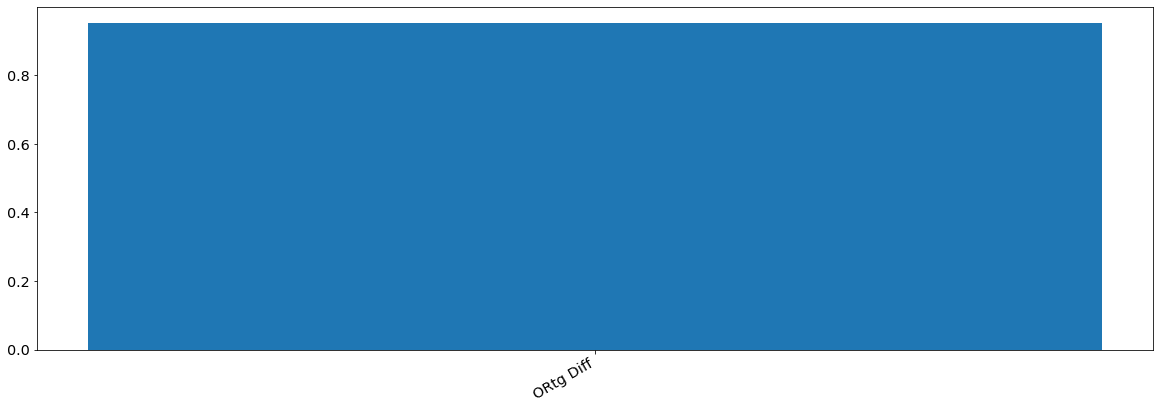

In [214]:
fig,ax = plt.subplots(figsize=(20,7))
ax.bar('ORtg Diff',np.mean(p19diff['ORtg Diff']))
plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.show()

In [144]:
# Save if need to reinitialize RS tables
rs19 = pd.read_csv('Team Ratings - Reg Season.csv')
rs19 = rs19[rs19['Season']==2019]
rs19 = rs19.drop(['Rk'],axis=1)
rs19['Team'] = rs19['Team'].apply(lambda x: x.split("*")[0])
rs19['Team'] = rs19['Team'].astype(str)
rs19 = rs19.set_index(['Team','Season'])
rs19;

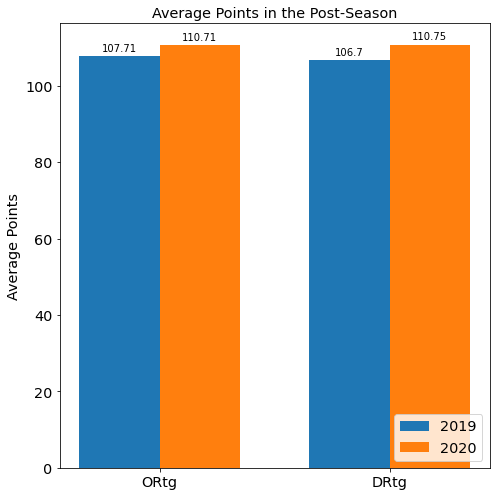

In [44]:
labels = ['ORtg','DRtg']
x=np.arange(len(labels))
width=0.35

ortg = [round(np.mean(rs19['ORtg']),2), round(np.mean(rs20['ORtg']),2)]
drtg = [round(np.mean(rs19['DRtg']),2), round(np.mean(rs20['DRtg']),2)]


fig, ax = plt.subplots(figsize=(7,7))

rects1 = ax.bar(x-width/2,ortg, width, color='tab:blue',label='2019')
rects2 = ax.bar(x+width/2,drtg, width, color='tab:orange',label='2020')

ax.set_ylabel('Average Points')
ax.set_title('Average Points in the Post-Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)



fig.tight_layout()
plt.show()



In [142]:
#2020 Playoff Ratings, with Reg Season Reference
p20 = pd.read_csv('Team Ratings - Playoffs.csv')
p20 = p20[p20['Season']==2020]
p20 = p20.drop(['Rk','G','W','L','W/L%','PW','PL'],axis=1)
p20 = p20.set_index(['Team','Season'])
p20['Reg ORtg'] = rs20['ORtg']
p20['Reg DRtg'] = rs20['DRtg']
p20['Reg NRtg'] = rs20['NRtg']
p20['Reg Pace'] = rs20['Pace']
p20['Reg FTr'] = rs20['FTr']
p20['Reg 3PAr']= rs20['3PAr']
p20['Reg TS%'] = rs20['TS%']
p20.reset_index(inplace=True)
p20

,Team,Season,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Reg ORtg,Reg DRtg,Reg NRtg,Reg Pace,Reg FTr,Reg 3PAr,Reg TS%
0,Los Angeles Lakers,2020,115.9,108.9,7.0,97.3,0.293,0.407,0.595,112.0,106.3,5.7,100.9,0.276,0.358,0.573
1,Miami Heat,2020,113.5,111.5,2.0,95.9,0.322,0.433,0.587,112.5,109.5,3.0,98.3,0.299,0.419,0.587
2,Boston Celtics,2020,111.3,106.3,5.0,96.4,0.285,0.429,0.572,113.3,107.0,6.3,99.5,0.259,0.386,0.570
3,Denver Nuggets,2020,113.6,116.0,-2.4,94.1,0.260,0.392,0.584,113.1,111.0,2.1,97.1,0.235,0.344,0.567
4,Los Angeles Clippers,2020,115.4,111.1,4.3,98.0,0.291,0.380,0.585,113.9,107.6,6.3,101.5,0.295,0.375,0.577
5,Toronto Raptors,2020,108.3,104.2,4.1,99.1,0.240,0.455,0.559,111.1,105.0,6.1,100.9,0.264,0.421,0.574
6,Houston Rockets,2020,108.3,107.5,0.8,98.6,0.235,0.545,0.569,112.9,110.1,2.8,103.7,0.288,0.501,0.578
7,Milwaukee Bucks,2020,109.7,108.5,1.2,100.3,0.279,0.426,0.568,112.4,102.9,9.5,105.1,0.271,0.428,0.583
8,Oklahoma City Thunder,2020,102.4,108.7,-6.3,100.1,0.281,0.428,0.542,110.8,108.8,2.0,98.8,0.290,0.353,0.573
9,Utah Jazz,2020,122.2,118.5,3.7,91.5,0.284,0.455,0.616,112.3,109.9,2.4,98.6,0.268,0.414,0.585


In [244]:
p20diff = p20.copy()
p20diff['ORtg Diff'] = round(p20diff['ORtg']/p20diff['Reg ORtg'],3)
p20diff['DRtg Diff'] = round(p20diff['DRtg']/p20diff['Reg DRtg'],3)
p20diff['NRtg Diff'] = round(p20diff['NRtg']-p20diff['Reg NRtg'],3)
p20diff['Pace Diff'] = round(p20diff['Pace']-p20diff['Reg Pace'],1)
p20diff['FTr Diff'] = round(p20diff['FTr']/p20diff['Reg FTr'],3)
p20diff['3PAr Diff'] = round(p20diff['3PAr']/p20diff['Reg 3PAr'],3)
p20diff['TS% Diff'] = round(p20diff['TS%']/p20diff['Reg TS%'],3)
p20diff = p20diff.set_index(['Team','Season'])
p20diff.reset_index(inplace=True)
p20diff.drop(p20diff.iloc[:,1:16],inplace=True,axis=1)
p20diff

,Team,ORtg Diff,DRtg Diff,NRtg Diff,Pace Diff,FTr Diff,3PAr Diff,TS% Diff
0,Los Angeles Lakers,1.035,1.024,1.3,-3.6,1.062,1.137,1.038
1,Miami Heat,1.009,1.018,-1.0,-2.4,1.077,1.033,1.000
2,Boston Celtics,0.982,0.993,-1.3,-3.1,1.100,1.111,1.004
3,Denver Nuggets,1.004,1.045,-4.5,-3.0,1.106,1.140,1.030
4,Los Angeles Clippers,1.013,1.033,-2.0,-3.5,0.986,1.013,1.014
5,Toronto Raptors,0.975,0.992,-2.0,-1.8,0.909,1.081,0.974
6,Houston Rockets,0.959,0.976,-2.0,-5.1,0.816,1.088,0.984
7,Milwaukee Bucks,0.976,1.054,-8.3,-4.8,1.030,0.995,0.974
8,Oklahoma City Thunder,0.924,0.999,-8.3,1.3,0.969,1.212,0.946
9,Utah Jazz,1.088,1.078,1.3,-7.1,1.060,1.099,1.053
